# **Projeto EBAC SQL para Análise de Dados**

***Olá, me chamo Victor Hugo e hoje eu vou apresentar minha análises baseadas nas minhas habilidades com SQL (Structured Query Language) e mostrar minhas analises, mas antes, vou mostrar os tipos de dados que foram trabalhados nesse projeto!!***

# Os dados: 

Os dados representam informações de clientes de um banco e contam com as seguintes colunas: 

* idade = idade do cliente
* sexo = sexo do cliente (F ou M)
* dependentes = número de dependentes do cliente
* escolaridade = nível de escolaridade do clientes
* salario_anual = faixa salarial do cliente
* tipo_cartao = tipo de cartao do cliente
* qtd_produtos = quantidade de produtos comprados nos últimos 12 meses
* iteracoes_12m = quantidade de iterações/transacoes nos ultimos 12 meses
* meses_inativo_12m = quantidade de meses que o cliente ficou inativo
* limite_credito = limite de credito do cliente
* valor_transacoes_12m = valor das transações dos ultimos 12 meses
* qtd_transacoes_12m  = quantidade de transacoes dos ultimos 12 meses







## **Exploração de dados:**

A primeira fase da análise é entender o que tem na nossa matéria prima. Vamos a exploração de dados:

**Qual a quantidade de informações temos na nossa base de dados?**

Query: SELECT count(*) FROM credito
> Reposta: 2564 linhas



**Como são os dados** 

Query: SELECT * FROM credito LIMIT 10;

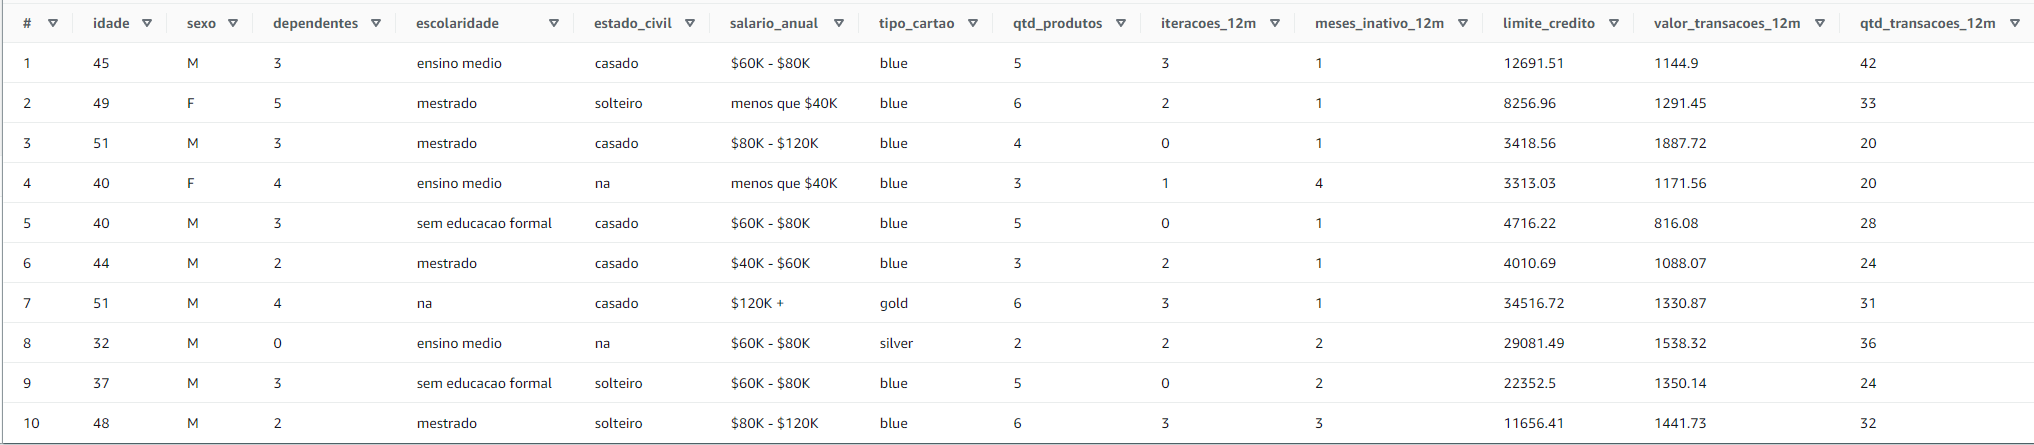
*Imagem melhor para visualização de todo dataset: [Dez primeiras linhas do dataset](https://github.com/marianeneiva/sqlEBAC/blob/main/limit10.png?raw=true)

> É possivel notar alguns dados faltantes dentro do nosso dataset

Query: DESCRIBE credito

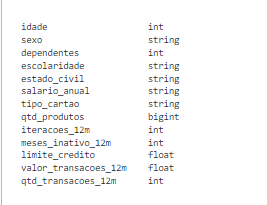

> Aqui é possivel ver quais são os tipos das variáveis que iremos trabalhar

Quais são os tipos de escolaridade disponíveis no dataset?

Query: SELECT DISTINCT escolaridade FROM credito

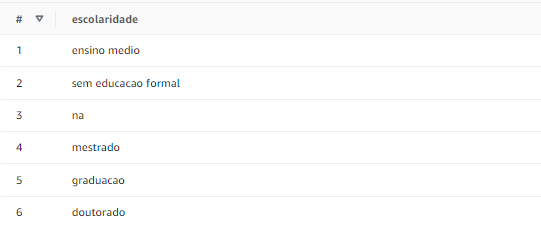

> Percebemos que aqui temos dados faltantes, no qual será tratado futuramente.

Quais são os tipos de estado_civil disponíveis no dataset?

Query: SELECT DISTINCT estado_civil FROM credito

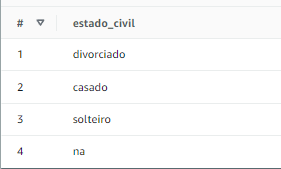

> Temos novamente dados faltantes

Quais são os tipos de salario_anual disponíveis no dataset?

Query: SELECT DISTINCT salario_anual FROM credito

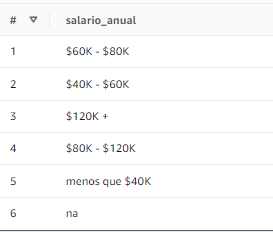

> Vemos que aqui é mostrado uma variação de salario e não o salario exatos das pessoas cadastradas no dataset e também encontramos dados nulos.

Quais são os tipos de cartão disponíveis no dataset?

Query: SELECT DISTINCT tipo_cartao FROM credito

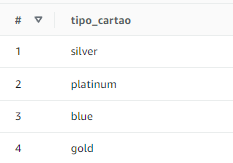

> Sem dados nulos/faltantes e descobrimos quais sãos os tipos de cartão que iremos trabalhar nesse conjunto de dados


# **Analise dos dados!**

> Aqui vou analisar o que influencia diretamente no tipo de cartão que os clientes tem nesse dataset! Bora!?

# Onde está concentrada a maior parte dos salarios?

Querys: Select count(*), salario _anual from credito group by salario _anual;

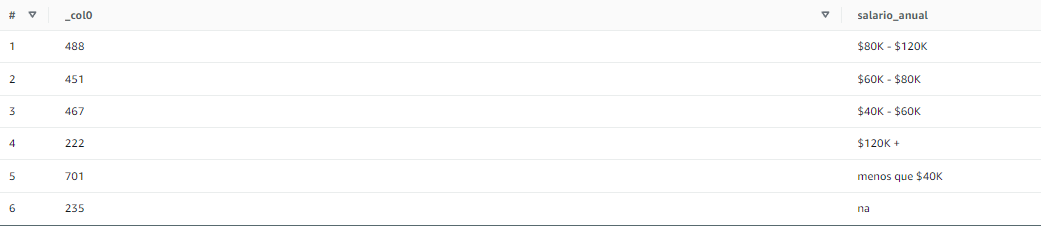

> Neste conjunto de dados, é percebido que a  maioria das pessoas ganham menos de 40K por ano e 235 nao informaram seu renda anual, isso pode significa que a empresa tem que focar nas pessoas de baixa renda

# O estado civil influencia no tipo de cartão?

Query: SELECT estado_civil, tipo_cartao, COUNT(*) AS contagem_por_cartao
FROM credito
GROUP BY estado_civil, tipo_cartao;

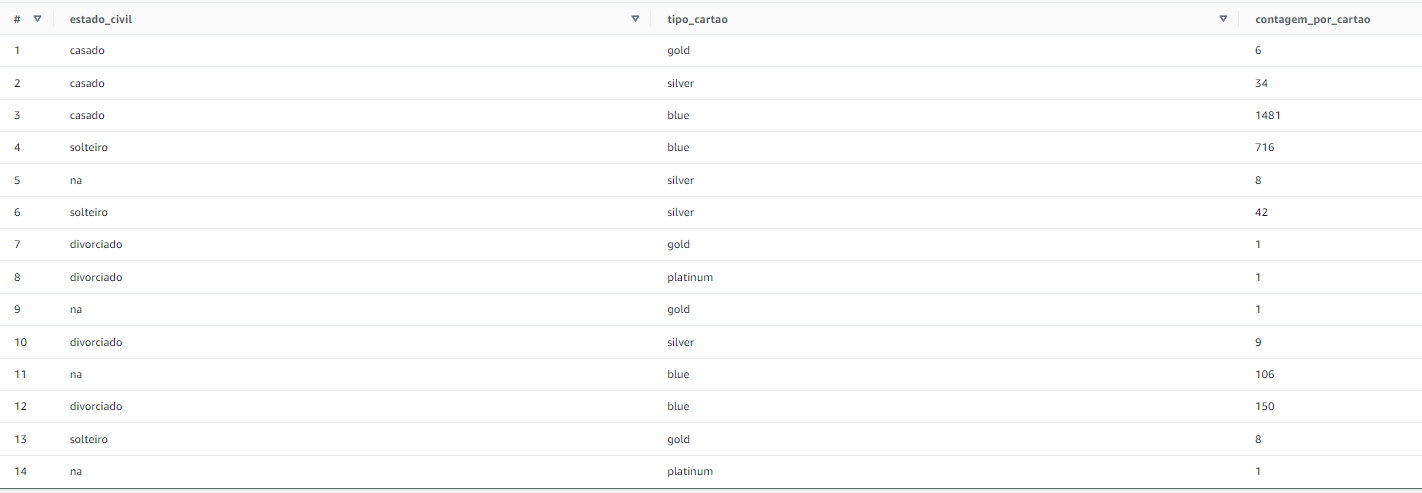

> Vimos que tanto os solteiros, casados, divorciados e os 'NAN', a maioria possue cartão do tipo blue, então isso significa que o estado civil não influencia no tipo de cartão, mas provavelmente pode influenciar a escolaridade e o valor de transações por ano. Vamos ver se é isso mesmo!!




# A escolaridade influencia no tipo de cartão das pessoas?

Query: Select count(*) as quantidade_escolaridade, tipo_cartao, escolaridade from credito group by escolaridade, tipo_cartao;

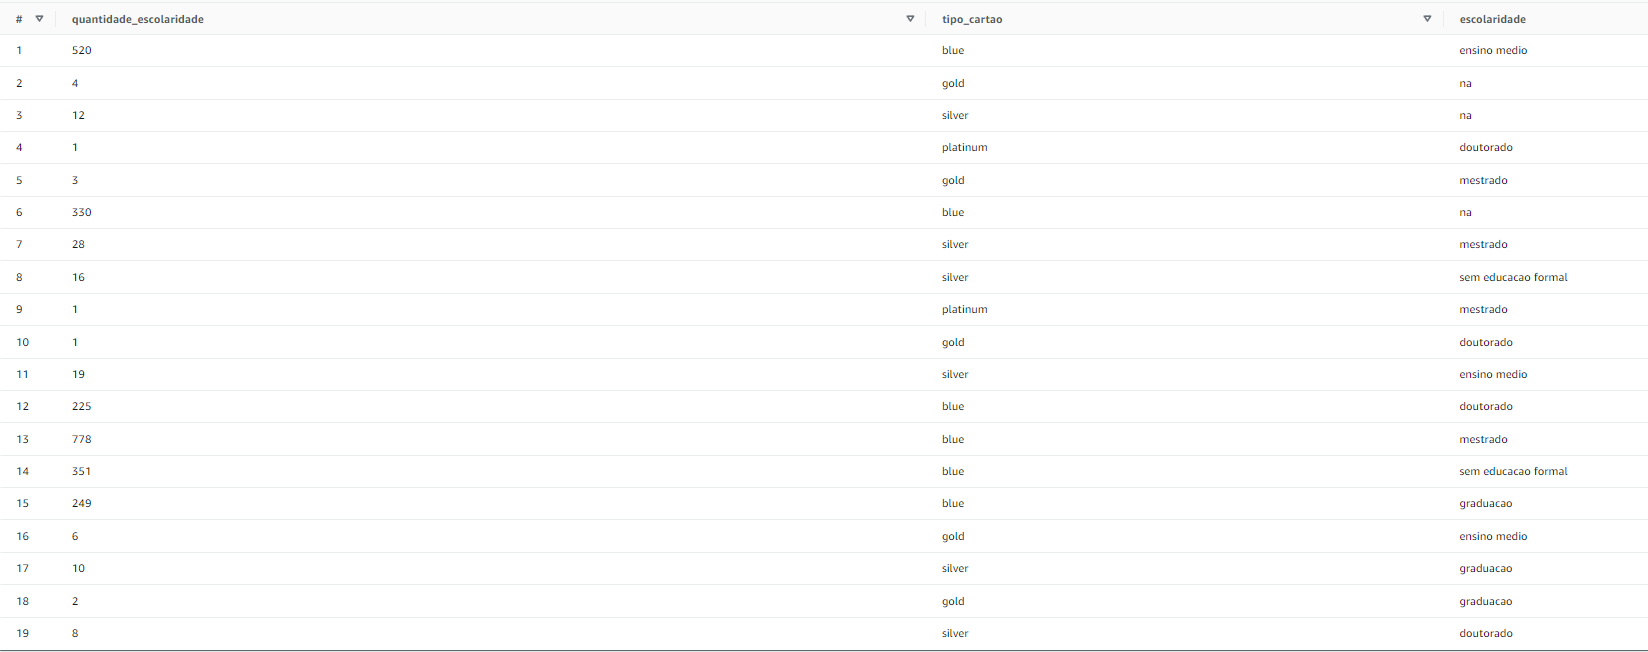


> *É notável que as pessoas tanto que tem mestrado, tanto nao tem escolaridade definida, e possuem cartão blue são altos, isso define que ambos tem os baixos/medios salarios e mostra que o tipo de cartão não se difere muito pelo nivel de escolaridade, mas talvez por outros motivos como salario anual, valor de transações em 12 meses*

# Valores medias, mínimos e máximos de transações por ano dos clientes.

Query: select min(valor_transacoes_12m) as transacao_minima, max(valor_transacoes_12m) as transacao_maxima, avg(valor_transacoes_12m) as transacoes_media from credito

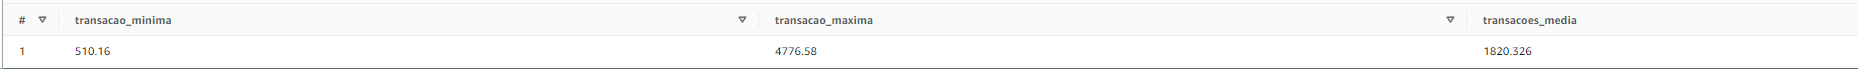

> Percebemos que não há um grande numero de transações ao ano, é notável que é bem baixo o valor de transações por ano neste conjunto de dados.

# As transações por ano influencia no tipo de cartão das pessoas?

Query: select tipo_cartao, avg(limite_credito) as media_valor_transacoes, avg(valor_transacoes_12m) as media_limite, sexo, salario_anual from credito where salario_anual != 'na' group by sexo, salario_anual, tipo_cartao order by tipo_cartao;

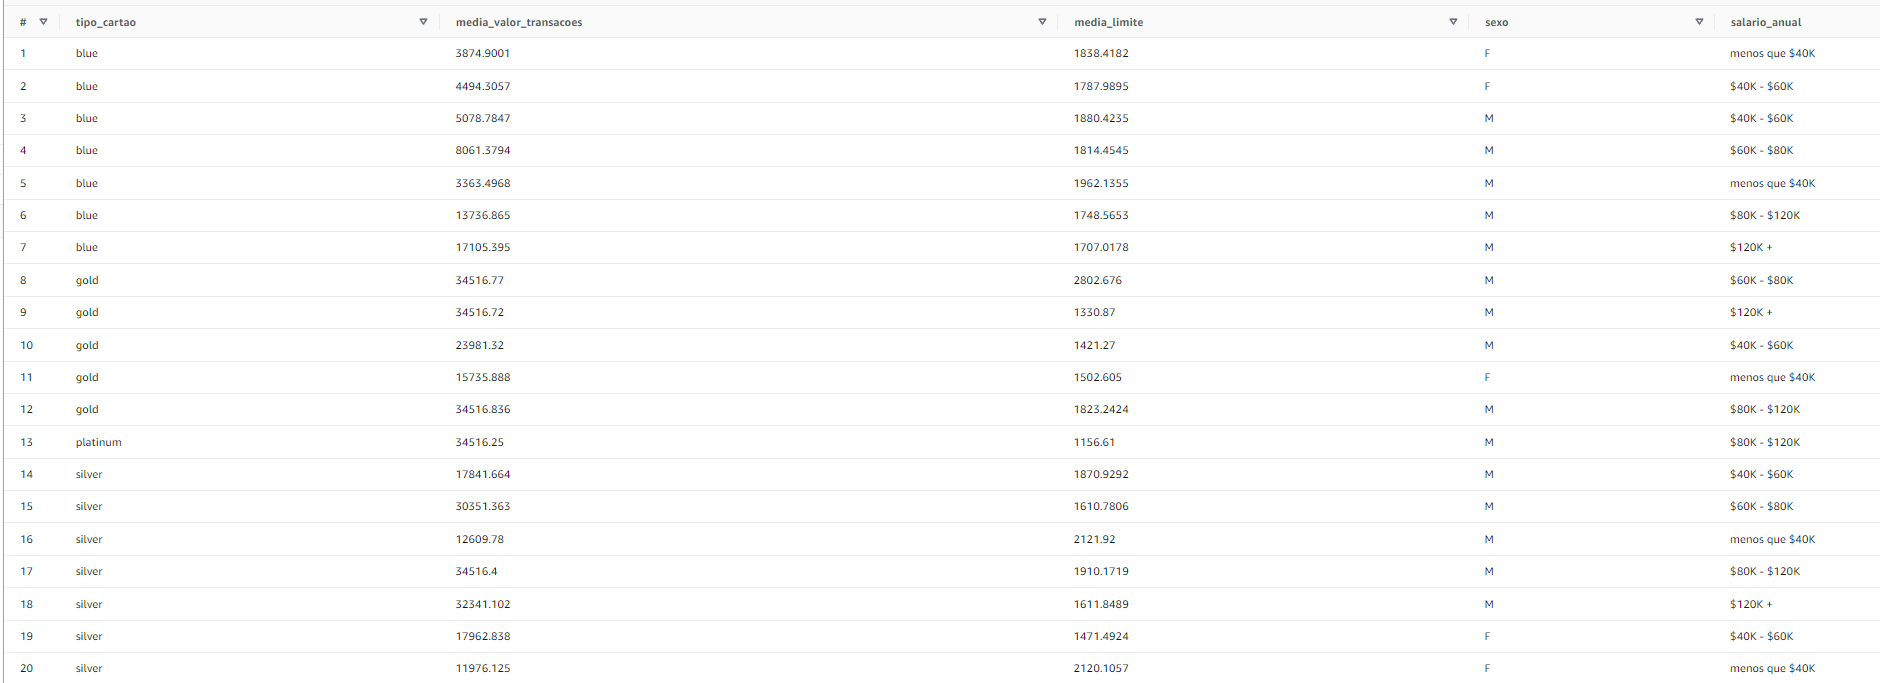

> Mostra que as pessoas que tem uma faixa salarial menor tem limite de credito menor, e assim, o valor de transação e o salario anual influencia sim, no tipo de cartão que as pessoas tem na marioria dos casos.





# Conclusão

Essas foram **algumas** análises extraídas do dataset de crédito.  

Alguns insights interessantes:

- A escolaridade não influencia em nada em questão do tipo de cartão
- O estado civil não influencia em nada em questão do tipo de cartão
- A maioria das pessoas recebem menos de 40k por ano, isso demonstra uma grande parte dos clientes que possuem baixa renda
- As transações por ano e o salario anual influenciam SIM no tipo de cartão que as pessoas usam, e é possível notar que as mulheres que possuem cartão blue, gold e silver (não possuem platinum) gastam menos que os homens que também tem o mesmo tipo de cartão.
- Não existem mulheres com salario maior de 60k
- Os maiores limites do cartão sãos dos homens
